In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLop/project1/Demand_dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [6]:
# Check for missing values in the dataset

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64


In [7]:
# 1080 data are missing, and the filling is not accurate, so deleting that columns is a better option.

df = df.dropna(subset=['id'])

In [8]:
#Filling

for column in df.columns:
    if df[column].isnull().sum()>0:
        if df[column].dtype=='object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6480 non-null   float64
 4   long       6480 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6480 non-null   object 
 9   capacity   6480 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 658.1+ KB


<ipython-input-8-f8a421c45f1e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-8-f8a421c45f1e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
#date -> int/float
df['date']= pd.to_datetime(df['date'], errors='coerce')

df['date Year'] = df['date'].dt.year
df['date Month'] = df['date'].dt.month
df['date Day'] = df['date'].dt.day

df.drop(columns=['date'], inplace=True)

<ipython-input-9-2a939f8fb81a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']= pd.to_datetime(df['date'], errors='coerce')


In [10]:
df['shop'] = df['shop'].str.extract('(\d+)').astype(int)


In [11]:
def convert_to_numeric(value):
    if 'ml' in value:
        return float(value.replace('ml', '')) / 1000
    elif 'lt' in value:
        return float(value.replace('lt', ''))
    return None

df['capacity'] = df['capacity'].apply(convert_to_numeric)


In [12]:
# Select categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

cardinality = df[categorical_col].nunique()

print(cardinality)

city         5
brand        5
container    3
dtype: int64


In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop over each categorical column
for col in categorical_col:
    if cardinality[col] < 5:
        # One-hot encode columns with low cardinality
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
        dummies = dummies.astype(int)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    else:
        # Label encode columns with high cardinality
        df[col] = label_encoder.fit_transform(df[col])

In [14]:
# Features (X) and target (y)
X = df.drop('quantity', axis=1)
y = df['quantity']



In [30]:
def mi_scores_df(X, y):
  mi_sc = mutual_info_regression(X, y)
  mi_sc = pd.Series(mi_sc, name="MI Scores", index=X.columns)
  mi_sc = mi_sc.sort_values(ascending=False)
  return mi_sc

mi_score = mi_scores_df(X, y)
print(mi_score)

price                0.291489
brand                0.198909
date Month           0.099705
id                   0.087359
city                 0.083165
long                 0.082092
shop                 0.081832
pop                  0.080459
lat                  0.080312
capacity             0.049038
container_plastic    0.043570
date Day             0.034276
container_can        0.031007
container_glass      0.001729
date Year            0.000000
Name: MI Scores, dtype: float64


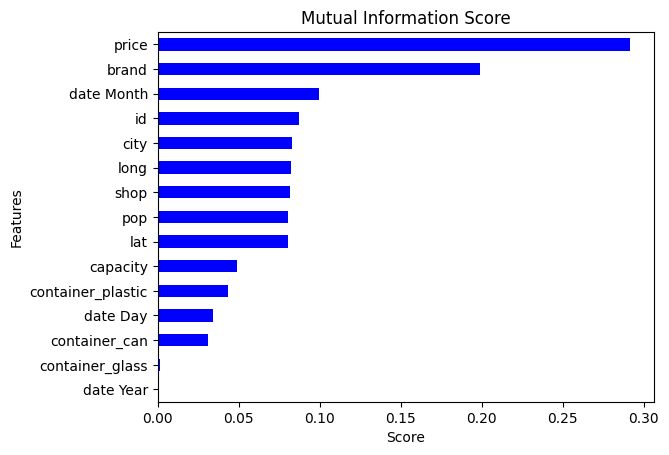

In [33]:
mi_score = mi_score.sort_values(ascending=True)
mi_score.plot(kind='barh', color='blue')
plt.title("Mutual Information Score")
plt.ylabel("Features")
plt.xlabel("Score")

plt.show()